In [18]:
import numpy as np
import wave
from scipy.io import wavfile
from scipy.fftpack import fft, ifft, dct, idct
import random
import matplotlib.pyplot as plt
import math

In [32]:
fs, data = wavfile.read("sound.wav")
z = data[2000:14000,1]
N = len(z)
L = [i for i in range(0,N,200)]
len(L)

60

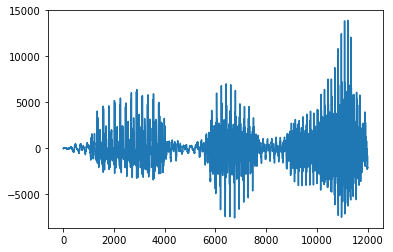

In [33]:
plt.plot(z)
plt.show()

In [34]:
def modified_dft(x,N):
    x_mod = []
    for l in L:
        y = [0]*N
        for i in range(int(((N-l-1)/2))+ 1):
            y[i] = x[i]
        for j in range(int((N+l+1)/2),N):
            y[j] = x[j]
        x_mod.append(y)
    return x_mod

In [35]:
def modified_dct(x, N):
    x_mod = []
    for l in L:
        y = [0]*N
        for i in range(N-l):
            y[i] = x[i]
        x_mod.append(y)
    return x_mod

In [36]:
z_dct = dct(z, norm = 'ortho')
mod_dct = modified_dct(z_dct,N)
mod_idct = []
for j in range(60):
    mod_idct.append(idct(mod_dct[j],norm = 'ortho'))

In [37]:
z_dft = fft(z)
mod_dft = modified_dft(z_dft,N)
mod_idft = []
for j in range(60):
    mod_idft.append(ifft(mod_dft[j]))

In [45]:
e_dct = []
for i in range(60):
    e_dct.append((np.sum(abs(np.array(z)-np.array(mod_idct[i]))**2)) / N)

In [38]:
e_dft = []
for i in range(60):
    e_dft.append((np.sum(abs(np.array(z)-np.array(mod_idft[i]))**2)) / N)

In [39]:
#bit_precision
b = []
for i in range(1,len(L)):
    b.append(16 * float(N - L[i])/L[i])

In [40]:
h2 = np.array([[1,1],[1,-1]])
def haar_mat(n):
    n = int(n)
    if n == 1:
        return h2
    else:
        a = np.kron(haar_mat(n-1),[1,1])
        b = np.kron(np.identity(int(math.pow(2,n-1)))*math.pow(2,(n-1)/2.0),[1,-1])
        #print(np.concatenate((a,b),axis=0))
        return np.concatenate((a,b),axis=0)
def haar(x):
    return np.matmul(haar_mat(math.log(len(x),2)),np.transpose(x))

In [41]:
def inverse_haar(y):
    n = int(math.log(len(y),2))
    N = len(y)
    hn = haar_mat(n)
    return np.matmul(np.transpose(hn)/N,np.transpose(y))

In [42]:
x = np.array(z)
z_haar = haar(x[0:8192])
mod_haar = modified_dct(z_haar,8192)
mod_ihaar = []
for j in range(60):
    mod_ihaar.append(inverse_haar(mod_haar[j]))

In [43]:
e_haar = []
for i in range(60):
    e_haar.append((np.sum(abs(x[0:8192]-np.array(mod_ihaar[i]))**2)) / 8192)

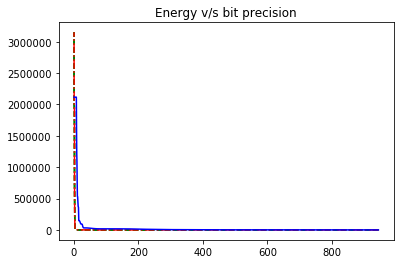

In [56]:
plt.plot(b[0:59],e_dct[1:60],'g--', label = 'dct')
plt.plot(b[0:59],e_dft[1:60], 'r-.', label = 'dft')
plt.plot(b[0:59],e_haar[1:60], 'b', label = 'haar')
plt.title("Energy v/s bit precision")
plt.show()

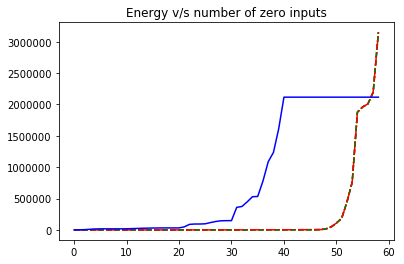

In [53]:
plt.plot(e_dct[1:60],'g--')
plt.plot(e_dft[1:60], 'r-.')
plt.plot(e_haar[1:60], 'b')
plt.title("Energy v/s number of zero inputs")
plt.show()